In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import os

%matplotlib inline

In [ ]:
df = pd.DataFrame()

In [5]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\Pfizer Vaccine\vaccination_tweets.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [8]:
df["user_created"] = pd.to_datetime(df["user_created"])
df.loc[0, "user_created"]

Timestamp('2009-04-08 17:52:46')

In [9]:
df["date"] = pd.to_datetime(df["date"])
df.loc[0, "date"]

Timestamp('2020-12-20 06:06:44')

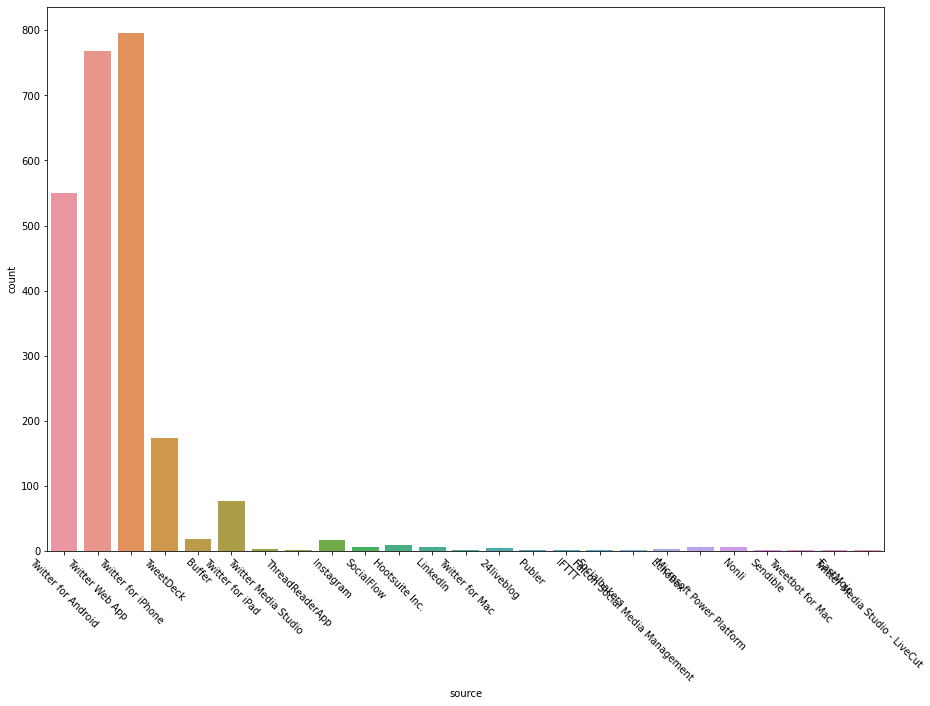

In [18]:
plt.figure(figsize = (15, 10))
verified_count = sb.countplot(x = "source", data = df)
plt.xticks(rotation = -45)
verified_count

In [19]:
df["created_day"] = df["user_created"].dt.day_name()
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,created_day
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Wednesday
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,Monday
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Thursday
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,Wednesday
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Thursday


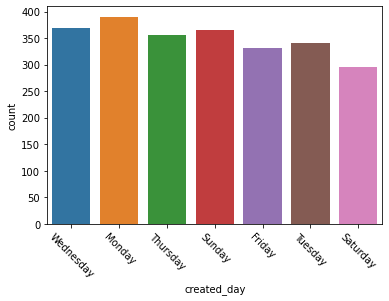

In [21]:
acc_date = sb.countplot(x = "created_day", data = df)
plt.xticks(rotation = -45)
acc_date

In [24]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'created_day'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                2446 non-null   int64         
 1   user_name         2446 non-null   object        
 2   user_location     1938 non-null   object        
 3   user_description  2326 non-null   object        
 4   user_created      2446 non-null   datetime64[ns]
 5   user_followers    2446 non-null   int64         
 6   user_friends      2446 non-null   int64         
 7   user_favourites   2446 non-null   int64         
 8   user_verified     2446 non-null   bool          
 9   date              2446 non-null   datetime64[ns]
 10  text              2446 non-null   object        
 11  hashtags          1831 non-null   object        
 12  source            2445 non-null   object        
 13  retweets          2446 non-null   int64         
 14  favorites         2446 n

##### Manipulating for Missing Values

Text(0.5, 1.0, 'Missing Values Exploration')

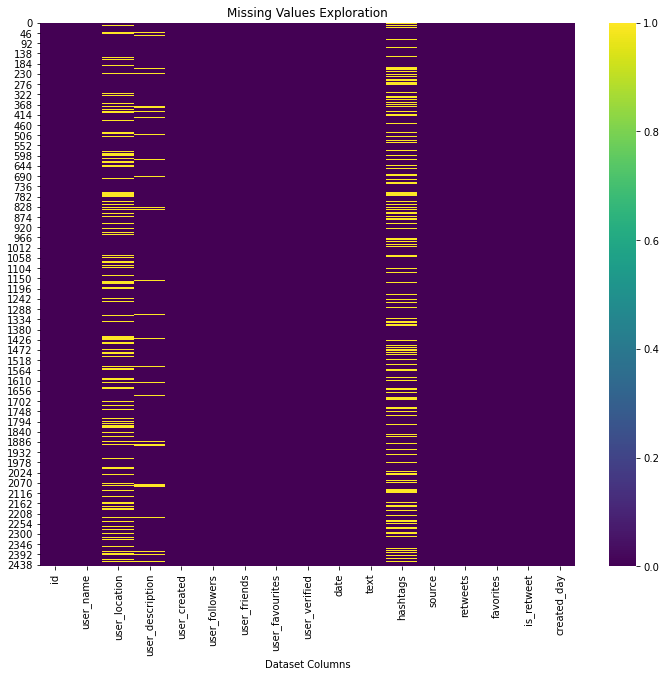

In [27]:
plt.figure(figsize = (12, 10))
sb.heatmap(data = df.isnull(), cmap = "viridis")
plt.xlabel("Dataset Columns")
plt.title("Missing Values Exploration")

Text(0.5, 1.0, 'Missing Values Exploration')

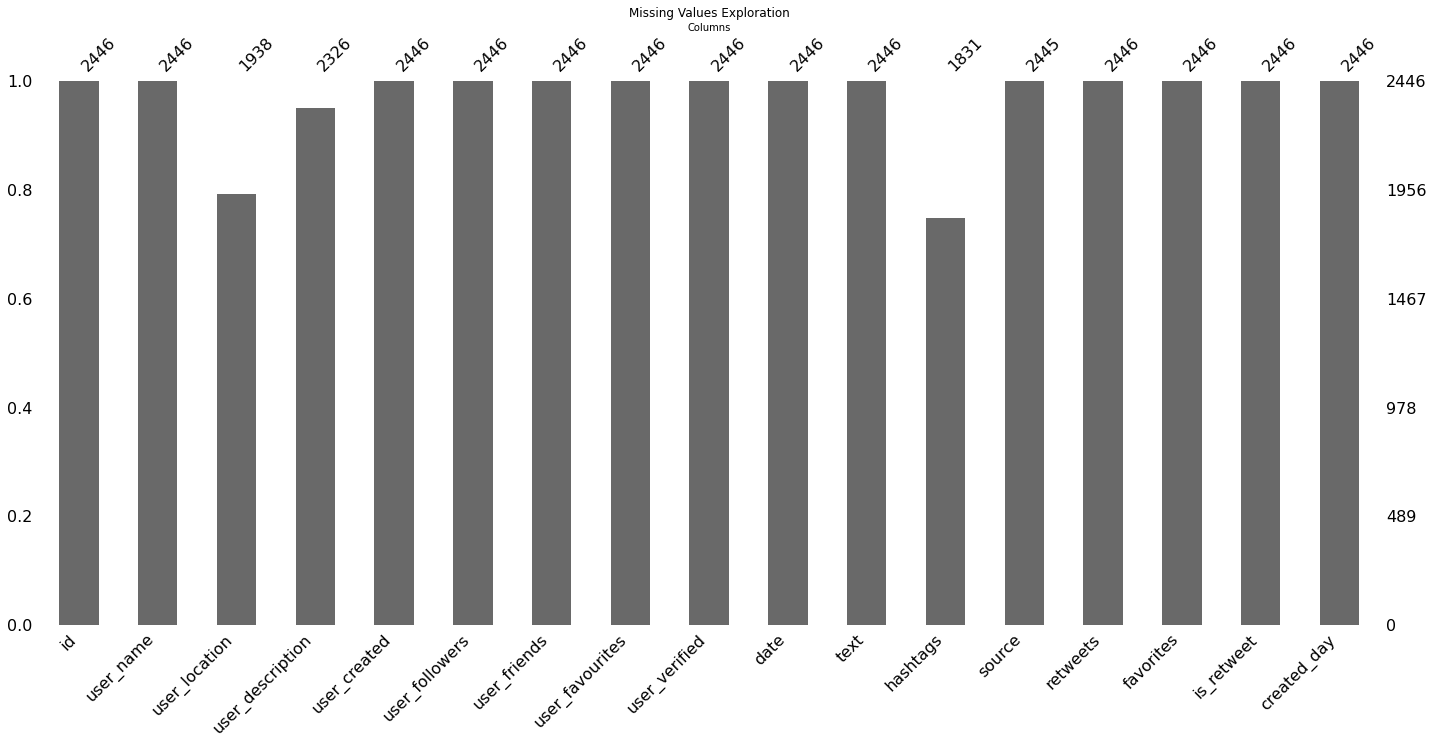

In [33]:
msno.bar(df)
plt.xlabel("Columns")
plt.title("Missing Values Exploration")

In [34]:
df["user_location"].unique()

array(['La Crescenta-Montrose, CA', 'San Francisco, CA', 'Your Bed',
       'Vancouver, BC - Canada', nan, 'Birmingham, England',
       'Austria, Ukraine and Kosovo', 'Islamabad', 'Turkey-Israel',
       'India', 'London, England', 'Global', 'Türkiye', 'Bristol, UK',
       'Los Angeles, CA', 'Rochester, NY', 'Mumbai, India',
       'Nottingham, England', 'Crete, Greece', 'Rome, Italy',
       'Not Today ', 'London', 'Berlin, Germany', 'Cranbury, NJ',
       'Cork, Ireland', 'Nottinghamshire, England',
       'دبي, الامارات العربية المتحدة', 'USA🇺🇸', 'Wales, United Kingdom',
       'Egypt', 'America', 'The European Union', 'India | USA',
       'Medford, OR', 'London, UK', 'Chicago, IL',
       'LI, NYC, NJ, PA, NE, USA', 'Seattle, WA', 'Ontario',
       'La Belle Province', 'Moronto City Of #Morons Canada',
       'Jefferson City, MO', 'Hawaii & HongKong ', 'wilmington,de',
       'Toronto ', 'Toronto, Ontario', 'BERLIN', 'New Jersey, USA', ' ',
       'Sacramento, CA', 'Vancouver, B

In [38]:
df["user_location"] = df["user_location"].fillna("Not Reported")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,created_day
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Wednesday
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,Monday
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Thursday
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,Wednesday
4,1337854064604966912,Citizen News Channel,Not Reported,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Thursday


In [39]:
df["user_location"].nunique()

851

#### Analyse the tweets per day

In [51]:
df["hashtags"] = df["hashtags"].fillna("no hastag")

df.dropna(axis = "index", how = "any", inplace = True)

In [58]:
date = df.groupby("date").count().reset_index()

sb.lineplot(x = date, y = "id", data = date)
plt.title("Tweets Per Day")

ValueError: Shape of passed values is (17, 6), indices imply (2324, 6)